## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Catherine Heming*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [19]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')
health.head()

/var/folders/vr/34fwj3tj7g781vkwzg10v4gm0000gn/T/ipykernel_44314/2771141350.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [20]:
# Catherine
# distribution of different variables

print('number of unique countries:' , len(health['Entity'].unique()))
print('number of unique years:' , len(health['Year'].unique()))
print('number of unique Schizo:' , len(health['Schizophrenia (%)'].unique()))
print('number of unique Biolar:' , len(health['Bipolar disorder (%)'].unique()))
print('number of unique Ed:' , len(health['Eating disorders (%)'].unique()))
print('number of unique anxiety:' , len(health['Anxiety disorders (%)'].unique()))
print('number of unique drug:' , len(health['Drug use disorders (%)'].unique()))
print('number of missing depres:' , len(health['Depression (%)'].unique()))
print('number of missing alcohol:' , len(health['Alcohol use disorders (%)'].unique()))

print(" ")
print('missing values:',health.isna().any())
print('number of missing Schizo:' , len(health.loc[health['Schizophrenia (%)'].isna()]))
print('number of missing Biolar:' , len(health.loc[health['Bipolar disorder (%)'].isna()]))
print('number of missing Ed:' , len(health.loc[health['Eating disorders (%)'].isna()]))
print('number of missing anxiety:' , len(health.loc[health['Anxiety disorders (%)'].isna()]))
print('number of missing drug:' , len(health.loc[health['Drug use disorders (%)'].isna()]))
print('number of missing depres:' , len(health.loc[health['Depression (%)'].isna()]))
print('number of missing alcohol:' , len(health.loc[health['Alcohol use disorders (%)'].isna()]))



number of unique countries: 276
number of unique years: 259
number of unique Schizo: 25662
number of unique Biolar: 19359
number of unique Ed: 72658
number of unique anxiety: 6458
number of unique drug: 6436
number of missing depres: 6461
number of missing alcohol: 6460
 
missing values: index                        False
Entity                       False
Code                          True
Year                         False
Schizophrenia (%)             True
Bipolar disorder (%)          True
Eating disorders (%)          True
Anxiety disorders (%)         True
Drug use disorders (%)        True
Depression (%)                True
Alcohol use disorders (%)     True
dtype: bool
number of missing Schizo: 82678
number of missing Biolar: 89147
number of missing Ed: 8317
number of missing anxiety: 102085
number of missing drug: 102085
number of missing depres: 102085
number of missing alcohol: 102085


In [21]:
health.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


### Data cleaning
*By Catherine heming and Becca Muro*

From the data quality check we realized that:

1. There are 276 unique countries, but many of these are undeveloped nations that may have poor medical care data. So we decided to work on a subset of countries.

2. There is data from years that will not be helpful in any model we run. For example, we do not need to study mental health rates from 300 BCE.

3. All of the mental health disorders in our dataframe have several Nan value. Most of these appeared in the years before the 1990s and in countries that are less developed. So we decided it would be fine to remove any remaining Nan values because there were not a significant amount affecting our data of interest. 

The code below implements the above cleaning.

In [22]:
# Catherine

# Select data from certain countries that we know have developed health care systems.  
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore'])]

# reset index 
developed = developed.reset_index(drop=True)
developed = developed.drop('index', axis=1)



In [23]:
# Becca 
# edit the column names to assist in running any future models
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}


developed.rename(columns=map_names,inplace=True)


# Catherine
# converting from object to float
developed['schizo'] = developed['schizo'].astype(float)
developed['bipolar'] = developed['bipolar'].astype(float)
developed['eating_dis'] = developed['eating_dis'].astype(float)


# just for years 1990 - 2017
developed = developed.loc[developed['year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])] 


# dropping NA
developed1 = developed.dropna()

len(developed1) # we had 896 data points to work with 



896

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [24]:
# Catherine Heming 

# using numpy to split into 2 by 80% for training set and the remaining for the rest
developed2 = developed1.sample(frac = 1)
train,test = np.split(developed2,[int(0.80 * len(developed2))])



In [25]:
# Catherine 

#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
train = train.sample(frac=1)
k = 5 #5-fold cross validation
fold_size = np.round(train.shape[0]/k)

In [26]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

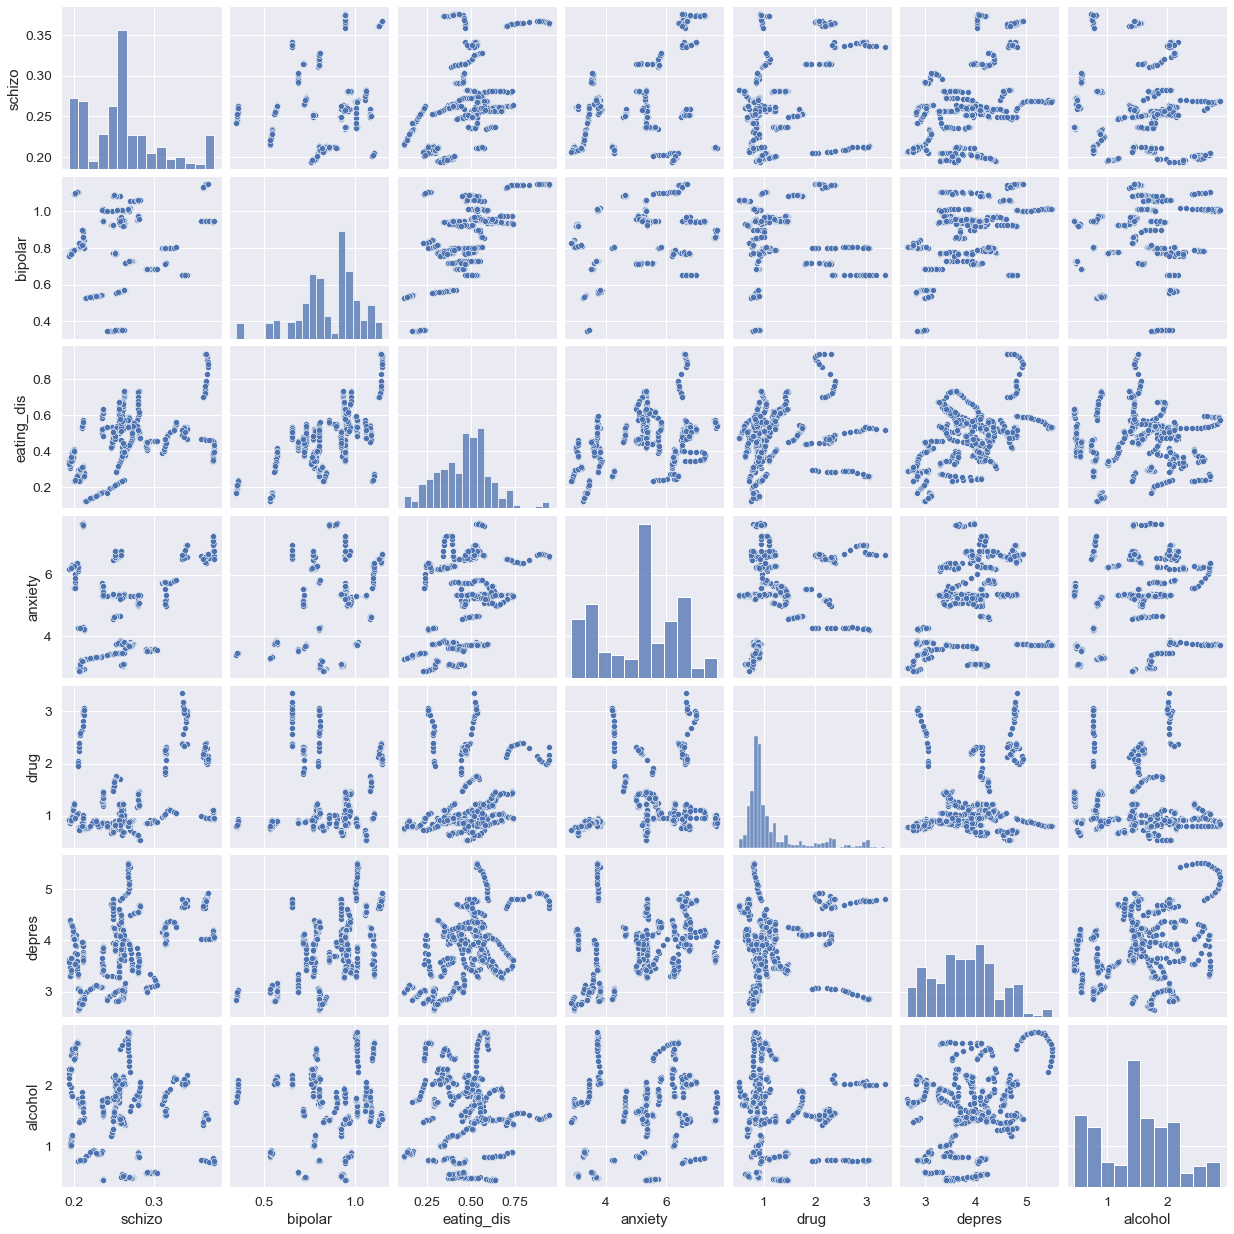

In [27]:
# Marlene
sns.pairplot(train)
plt.show()

In [31]:
# Marlene
# model with no changes
ols_object = smf.ols(formula = 'depres~alcohol + drug + anxiety', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     79.47
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.38e-44
Time:                        19:15:28   Log-Likelihood:                -587.10
No. Observations:                 716   AIC:                             1182.
Df Residuals:                     712   BIC:                             1201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3865      0.094     25.311      0.000       2.201       2.572
alcohol        0.2103      0.034      6.131      0.000       0.143       0.278
drug           0.1030      0.039      2.661      0.008       0.027       0.179
anxiety        0.1912      0.017     11.306      0.000       0.158       0.224
==============================================================================
Omnibus:                       60.790   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.276
Skew:                           0.773   Prob(JB):                     7.43e-17
Kurtosis:                       3.314   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

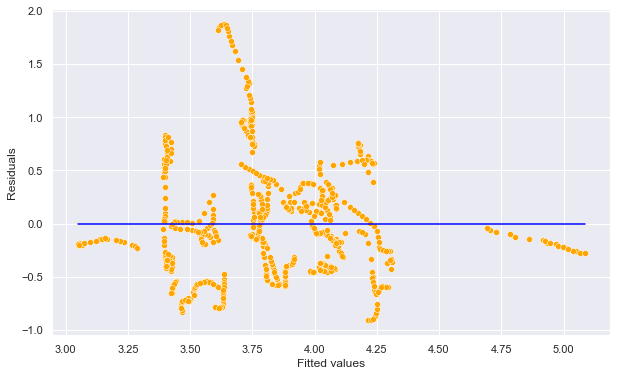

In [37]:
# Marlene
# Plotting residuals vs fitted values for simple untouched model
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (model.fittedvalues), y=(model.resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [33]:
# Marlene
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'depres~alcohol*drug+I(anxiety**2)', data = train)
model = ols_object.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     71.80
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           4.29e-51
Time:                        19:15:32   Log-Likelihood:                -569.04
No. Observations:                 716   AIC:                             1148.
Df Residuals:                     711   BIC:                             1171.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6323      0.133     27.337      0.000       3.371       3.893
alcohol            -0.2902      0.079     -3.666      0.000      -0.446      -0.135
drug               -0.5813      0.105     -5.522      0.000      -0.788      -0.375
alcohol:drug        0.4830      0.068      7.096      0.000       0.349       0.617
I(anxiety ** 2)     0.0160      0.002      9.767      0.000       0.013       0.019
==============================================================================
Omnibus:                       91.602   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.583
Skew:                           0.925   Prob(JB):                     1.20e-28
Kurtosis:                       3.943   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

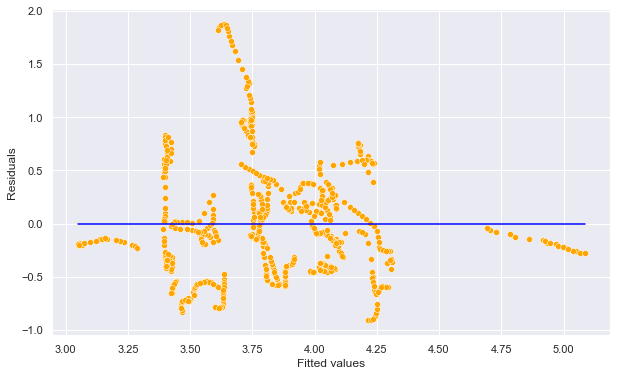

In [34]:
#Plotting residuals vs fitted values
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (model.fittedvalues), y=(model.resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [36]:
#Computing RMSE on test data
pred = model.predict(test)
np.sqrt(((test.depres - np.exp(pred))**2).mean())

51.218583170192865

In [10]:
# Catherine
# finding our variables of interest correlations to depression
# anxiety had the highest correlation

train.corrwith(train.depres)

schizo        0.497444
bipolar       0.460377
eating_dis    0.507614
anxiety       0.466319
drug          0.222348
depres        1.000000
alcohol       0.279063
dtype: float64

In [11]:
# predictor_set = ['schizo','bipolar','eating_dis','anxiety']
    #Degree of interactions being considered: 10 , 5-fold CV RMSE: 0.1173827889638829
    
# predictor_set = ['alcohol','bipolar','eating_dis','anxiety']
    # Degree of interactions being considered: 10 , 5-fold CV RMSE: 0.09223074863726474

In [12]:
# Catherine
# Below is the code to determine what degree of interaction is best. 
# Interactions of degree 2 produced the lowest RMSE

predictor_set = ['alcohol','bipolar','eating_dis','anxiety']
from itertools import product
values = np.arange(0,4)
polynomial_transformations = pd.DataFrame(product(values, repeat=4), columns=predictor_set).loc[1:,]
polynomial_transformations.loc[:,'sum_degree'] = (polynomial_transformations).astype(int).sum(axis=1)
polynomial_transformations.loc[:,'count_zeros'] = (polynomial_transformations == 0).astype(int).sum(axis=1)
polynomial_transformations.sort_values(by = ['count_zeros', 'sum_degree'], ascending=[False, True], inplace=True)
polynomial_transformations.drop(columns = ['count_zeros'], inplace=True)
polynomial_transformations.reset_index(inplace = True, drop = True)


In [13]:
# Catherine
from sklearn.model_selection import KFold

def KFoldCV(selected_interactions, interaction_being_tested):
    kf = KFold(n_splits=5)
    kf.get_n_splits(train)
    total_rmse = 0
    for i, (train_index,test_index) in enumerate(kf.split(train)):
        model = smf.ols('depres~alcohol+bipolar+eating_dis+anxiety'+selected_interactions+\
                       interaction_being_tested, data = train.iloc[train_index]).fit()
        pred_price = model.predict(train.iloc[test_index])
        rmse = np.sqrt(((train.depres - pred_price)**2).mean())
        total_rmse += rmse
    return total_rmse/k

In [14]:
# Catherine
# This code implements the algorithm of systematically considering interactions of degree 2 and going upto 
# the interaction of degree 12. For a given degree 'd' the interactions are selected greedily based on 
# highest reduction in the 5-fold cross validation RMSE. Once no more reduction in the 5-fold cross validation
# RMSE is possible using interactions of degree 'd', interaction terms of the next higher degree 'd+1' are considered.

# 5-fold cross validation RMSE of the initial model with the 4 predictors of degree one
cv_previous_model = KFoldCV(selected_interactions = '', interaction_being_tested = '')
interaction_being_tested = '+'
selected_interactions = ''

# Considering interactions of degree 'd' = 2 to 12
for d in np.arange(2,13):
    
    # Selecting interaction terms of degree = 'd'
    degree_set = polynomial_transformations.loc[polynomial_transformations.sum_degree==d, :]
    
    # Initializing objects to store the interactions of degree 'd' that reduce the
    # 5-fold cross validation RMSEs as compared to the previous model
    interactions_that_reduce_KfoldCV = []; cv_degree = []; 
    
    # Creating another DataFrame that will consist of the updated set of interactions of degree 'd' to be considered
    # as interactions that do not reduce the 5-fold cross validation RMSE will be discarded
    degree_set_updated = pd.DataFrame(columns = degree_set.columns)
    
    # Continue adding interactions of degree 'd' in the model until no interactions reduce 
    # the 5-fold cross-validation RMSE
    while True:
        
        #Iterating over all possible interactions of degree 'd'
        for index, row in degree_set.iterrows():
            
            # Creating the formula expression for the interaction term to be tested
            for predictor in predictor_set:
                interaction_being_tested = interaction_being_tested + ('I('+predictor +'**' +\
                                         str(row[predictor]) + ')*' if row[predictor]>1 else\
                                               predictor + '*' if row[predictor]==1 else '')
            interaction_being_tested = interaction_being_tested[:-1]
            
            # Call the function 'KFoldCV' to find out the 5-fold cross validation error on adding the 
            # interaction term being tested to the model
            cv = KFoldCV(selected_interactions, interaction_being_tested)
            
            # If the interaction term being tested reduces the 5-fold cross validation RMSE as compared to the
            # previous model, then consider adding it to the model
            if cv<cv_previous_model:
                interactions_that_reduce_KfoldCV.append(interaction_being_tested)
                cv_degree.append(cv)
                degree_set_updated = pd.concat([degree_set_updated, row.to_frame().T])
            interaction_being_tested = '+'
        cv_data = pd.DataFrame({'interaction':interactions_that_reduce_KfoldCV, 'cv':cv_degree})
        
        # Sort the interaction terms that reduce the 5-fold cross valdiation RMSE based on their respective
        # 5-fold cross validation RMSE
        cv_data.sort_values(by = 'cv', inplace = True)
        
        # Break the loop if no interaction of degree 'd' reduces the 5-fold cross validation RMSE as
        # compared to the previous model
        if cv_data.shape[0]==0:
            break
            
        # Select the interaction that corresponds to the least 5-fold cross validation RMSE
        selected_interactions = selected_interactions + cv_data.iloc[0,0]
        cv_previous_model = cv_data.iloc[0,1]
        cv_degree = []; interactions_that_reduce_KfoldCV = []
        degree_set = degree_set_updated.copy()
        degree_set_updated = pd.DataFrame(columns = degree_set.columns)
        
        # Print the progress after each model update, i.e., after an interaction term is selected
        print("Degree of interactions being considered:",d, ", 5-fold CV RMSE:", cv_previous_model)
      

Degree of interactions being considered: 2 , 5-fold CV RMSE: 0.45444222648467336
Degree of interactions being considered: 2 , 5-fold CV RMSE: 0.43237485502059025
Degree of interactions being considered: 2 , 5-fold CV RMSE: 0.42580670325526626
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.38921220498621834
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.36653250739487525
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.3601099828709693
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.3557208734330145
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.3523623286145404
Degree of interactions being considered: 3 , 5-fold CV RMSE: 0.3475502375316798
Degree of interactions being considered: 4 , 5-fold CV RMSE: 0.28022761555398495
Degree of interactions being considered: 4 , 5-fold CV RMSE: 0.26675024021716315
Degree of interactions being considered: 4 , 5-fold CV RMSE: 0.2526612072820781
Degree of interactions being cons

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

We first focused on anxiety as our target predictor. But we soon found through trial and error that interactions were actually very important in improving the robustness of our model. We first introduced them a bit randomly and did saw smalll improvements. But it wasn't until we ran the K-fold test and decided to interact all of them that we saw large improvements. Based on the test we interacted to the second degree and added individual terms to higer degrees. Our RMSE dropped by 0.1 which is large considering our units, and our R-squared rose 0.15 units. It was interesting to see that drug use by itself was not a string predictor of depression, but once it interacted with other terms, it became significant.


### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [15]:
# we all worked on developing the model together
depres_obj_11 = smf.ols(formula = 'depres~ I(alcohol**2)*bipolar*eating_dis*anxiety*drug*schizo \
    +I(bipolar**2)*alcohol*eating_dis*anxiety*drug*schizo+ \
    I(eating_dis**2)*anxiety*alcohol*bipolar*drug*schizo ' , data = train).fit()

#     +I(eating_dis**2)*anxiety*alcohol*bipolar*drug
# +  anxiety*alcohol*eating_dis*drug*schizo


In [16]:
depres_obj_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     472.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:58:57   Log-Likelihood:                 1047.0
No. Observations:                 716   AIC:                            -1790.
Df Residuals:                     564   BIC:                            -1095.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                               2970.6989   1976.827      1.503      0.133    -912.142    6853.540
I(alcohol ** 2)                                          897.3307    554.920      1.617      0.106    -192.631    1987.293
bipolar                                                -1.516e+04   6384.412     -2.374      0.018   -2.77e+04   -2617.938
I(alcohol ** 2):bipolar                                -1822.0131    653.126     -2.790      0.005   -3104.870    -539.156
eating_dis                                              5103.7453   3369.859      1.515      0.130   -1515.261    1.17e+04
I(alcohol ** 2):eating_dis                              1261.6474   1363.258      0.925      0.355   -1416.035    3939.329
bipolar:eating_dis                                      2.246e+04   6676.237      3.364      0.001    9344.501    3.56e+04
I(alcohol ** 2):bipolar:eating_dis                       298.1355   1542.704      0.193      0.847   -2732.011    3328.282
anxiety                                                -1001.4063    428.614     -2.336      0.020   -1843.282    -159.531
I(alcohol ** 2):anxiety                                  -48.2824    112.558     -0.429      0.668    -269.366     172.801
bipolar:anxiety                                         4158.9863   1371.617      3.032      0.003    1464.885    6853.088
I(alcohol ** 2):bipolar:anxiety                          184.4229    134.424      1.372      0.171     -79.610     448.456
eating_dis:anxiety                                     -1916.4651    799.182     -2.398      0.017   -3486.201    -346.729
I(alcohol ** 2):eating_dis:anxiety                      -373.3394    271.246     -1.376      0.169    -906.115     159.436
bipolar:eating_dis:anxiety                             -2370.9526   1423.951     -1.665      0.096   -5167.848     425.943
I(alcohol ** 2):bipolar:eating_dis:anxiety               117.6804    310.510      0.379      0.705    -492.217     727.578
drug                                                     474.0145   2126.998      0.223      0.824   -3703.790    4651.819
I(alcohol ** 2):drug                                    -748.3839    650.029     -1.151      0.250   -2025.156     528.389
bipolar:drug                                            5491.0688   7038.770      0.780      0.436   -8334.336    1.93e+04
I(alcohol ** 2):bipolar:drug                            1576.5287    750.296      2.101      0.036     102.813    3050.245
eating_dis:drug                                        -7283.4155   3924.260     -1.856      0.064    -1.5e+04     424.534
I(alcohol ** 2):eating_dis:drug                        -2192.6740   1540.592     -1.423      0.155   -5218.673     833.325
bipolar:

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.

In [17]:
# Catherine 
# calculating RMSE
pred = depres_obj_11.predict(test)
print('RMSE from the model above:' , np.sqrt(((test.depres - pred)**2).mean()))

RMSE from the model above: 0.06459351196903515


The results look very chaotic, but the model is actually quite simple. The K-fold test showed that interaction would be very important, which made sense to our hypothesis. We beagn with just a few variables, but because they all had fairly high correlation with depression, we included them all to varing degrees. For example, including alcohol to the second power was very important to both the R-squared and the RMSE. If we wanted to make it a bit cleaner we could go in and manually create the strongest interaction terms, however we were satisfied with an R-squared greater than 0.99 and an RMSE under 0.07. Any additonal changes seemed to make miniscule changes to these values.

We learned that even though countries has high variability in mental health rates, which could be a result of stigma, data collection, or healthcare, there is still an obvious relationship between high rates of depression and high rates of other mental disorders. 

Not only is it apparent that there is a significant positive correlation between depression and mental health rates, but there is also large affect between the interactions of mental health disorders. For example, high rates of alcohol and drug use aren't necessarily a strong predictor of depression, however, high rates of alcohol and anxiety are. 

This makes us that healthcare policy should expand coverage to mental health resources such as therapy, which would support treating anxiety. In addition, if this study were to be done within the United States, it can identify regions that are at risk for higher rates of depression based on diagnoses of other mental health disorders. In the same manner, it can be used to make predictions about less developed nations that may not have as accurate data. 